# IMPLEMENTING A PERCEPTRON LEARNING ALGORITHM IN PYTHON

# The Perceptron Learning Rule:
1. Intialize the weights and bias unit to 0 or small random numbers
2. For each training example,xi:
     - compute the output value,predict(yi)
     - Update the weights and bias unit
         - w = w + delta(w)
         - b = b + delta(b)
         - the delta(w) and delta(b) are computed using the learning rate and the error 
         - the error is computed as yi - predict(yi),yi = true class label and predict(yi) = predicted class label
         - delta(w) = eta * (yi - predict(yi)) * xi ,eta = learning rate
         - delta(b) = eta * (yi - predict(yi)) 

- Perceptron is a Binary Classifier
- The perceptron algorithm can be extended to multi-class classification - the One-Versus-All(OVA) or One-Versus-Rest(OVR)  technique.

In [1]:
import numpy as np
from IPython.display import Image

![image](https://images.javatpoint.com/tutorial/machine-learning/images/perceptron-in-machine-learning2.png)

REF:
- https://www.youtube.com/watch?v=t2ym2a3pb_Y
- https://github.com/patrickloeber/MLfromscratch/tree/master

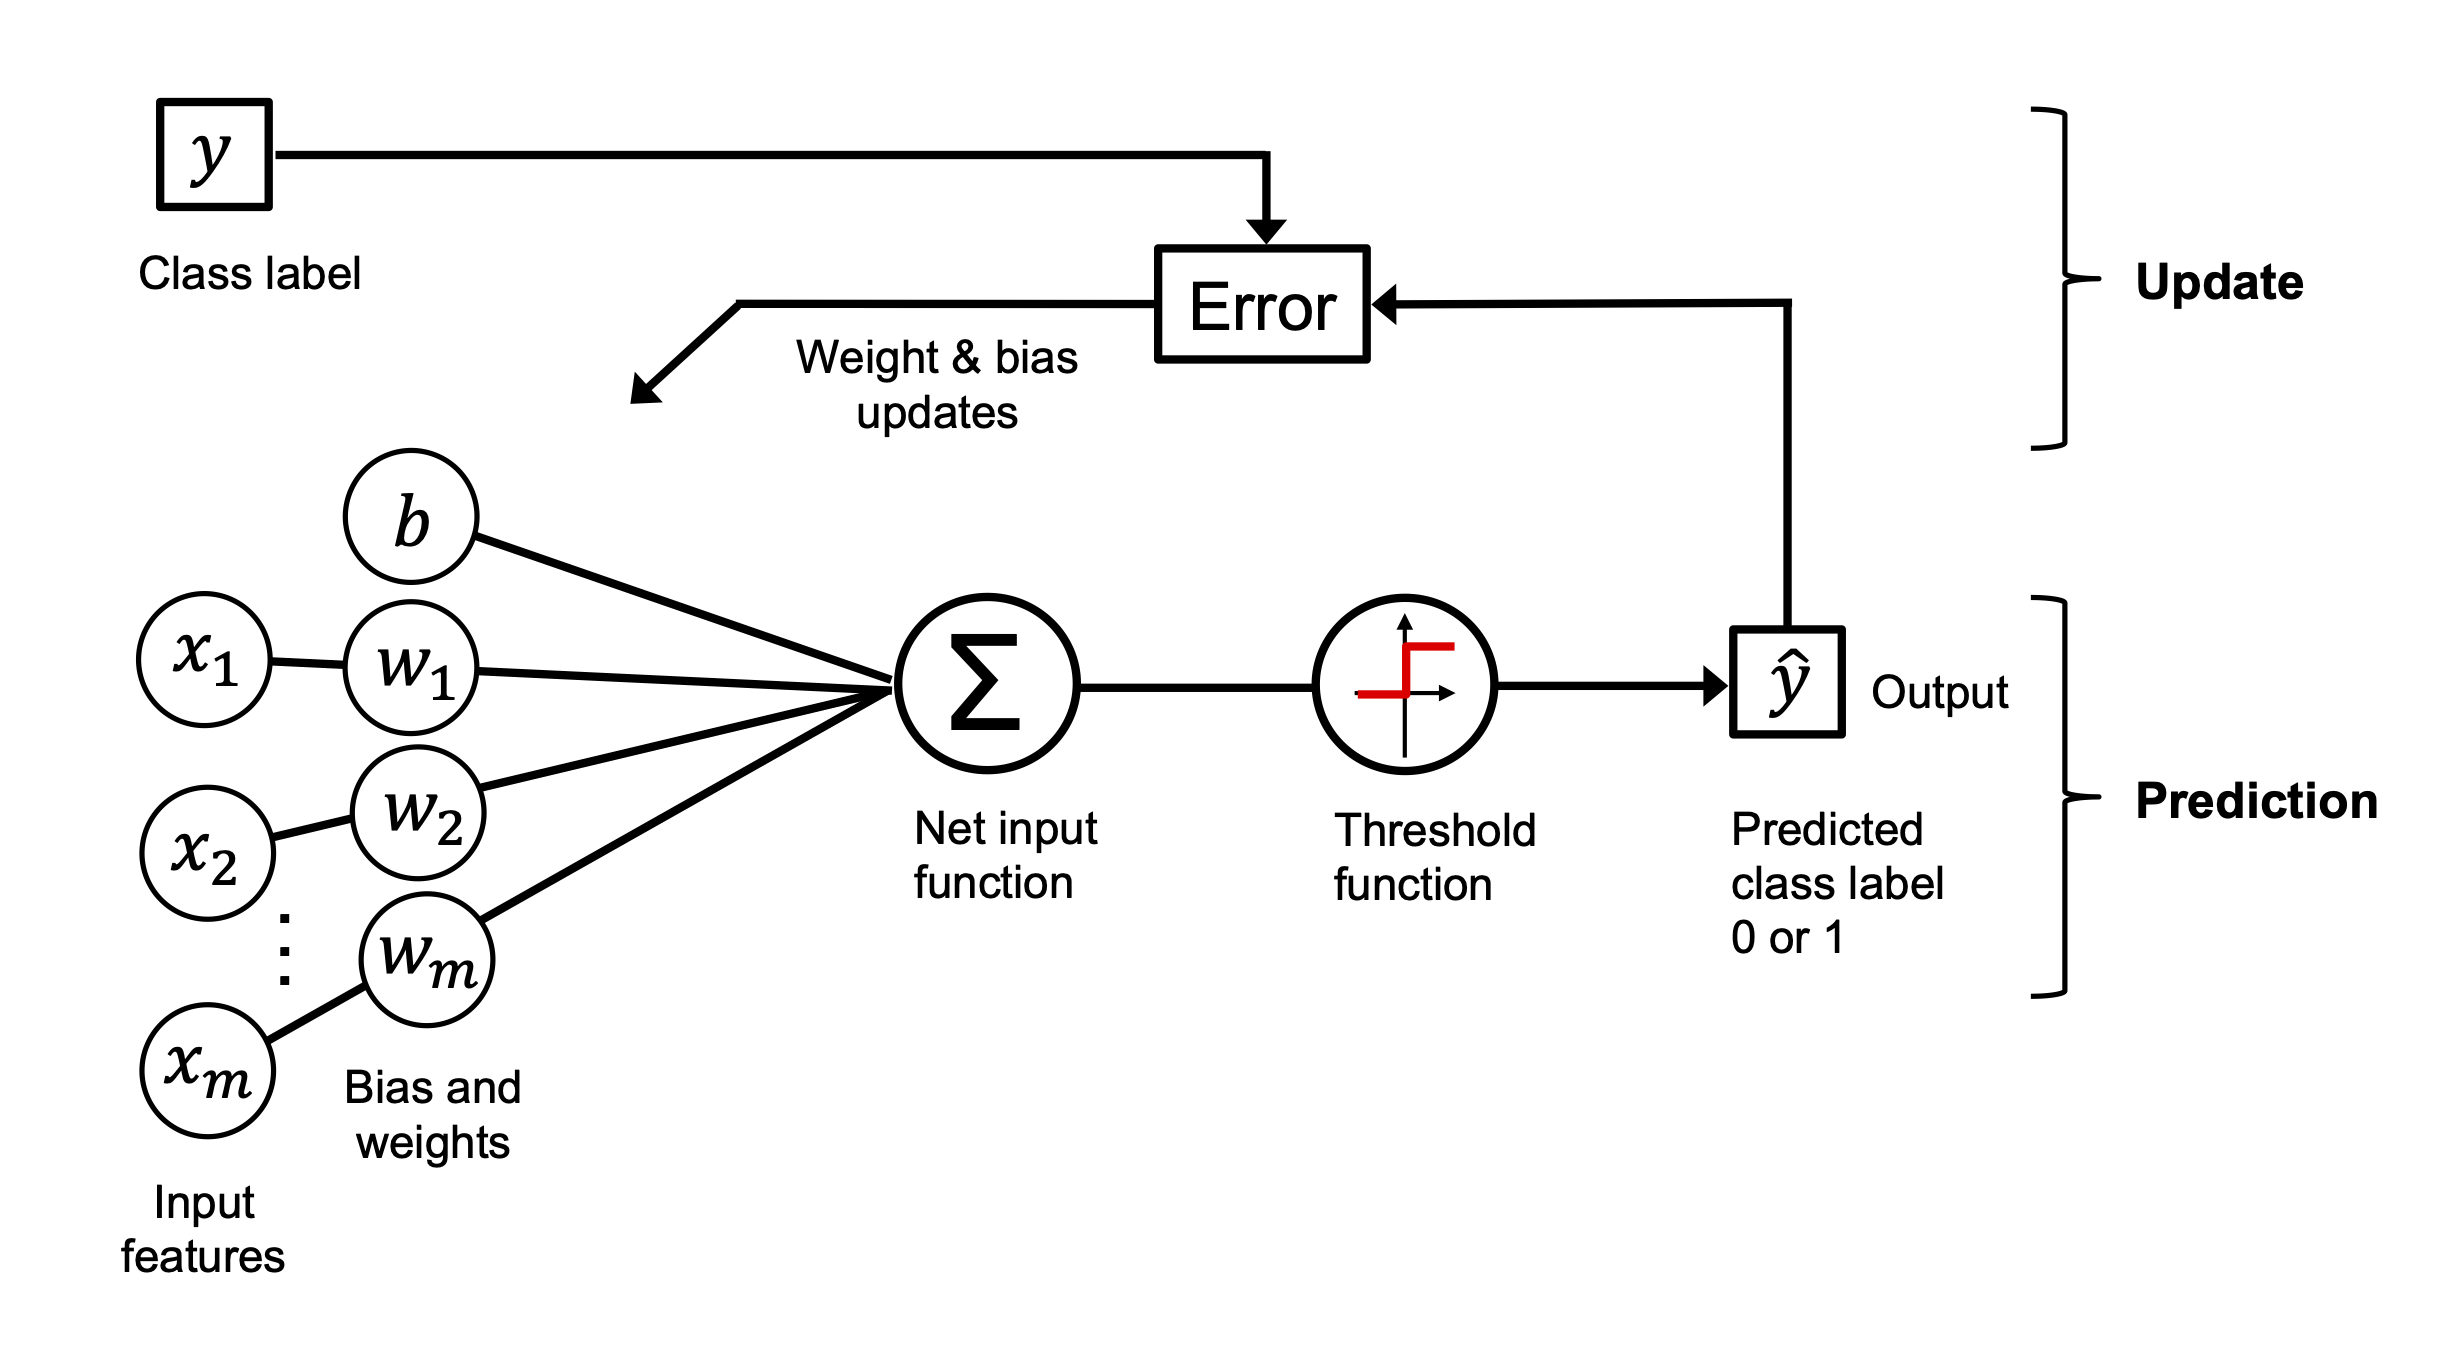

In [2]:
Image(filename='./Images/02_04.png', width=600) 

In [3]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    

In [4]:
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2)/(np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [5]:
v1 

array([1, 2, 3])

In [6]:
v2

array([0.5, 1. , 1.5])

In [7]:
c = v1.dot(v2)

In [8]:
a = np.linalg.norm(v1)

In [9]:
b = np.linalg.norm(v2)

In [10]:
d = c/(a * b )

In [11]:
d

1.0

In [12]:
np.arccos(d)

0.0

# Testing

In [13]:
import os
import pandas as pd

In [14]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:',s)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [15]:
df = pd.read_csv(s,header=None,encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
df.shape

(150, 5)

- first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers.
- convert the class labels into two interger class labels,1 (Versicolor) and 0 (Setosa) that assign to a vector,y,where the values method.
- We extract the first feature column (sepal length) and third feature column (petal length) of those 100 training examples and assign them to a feature matrix,X. 

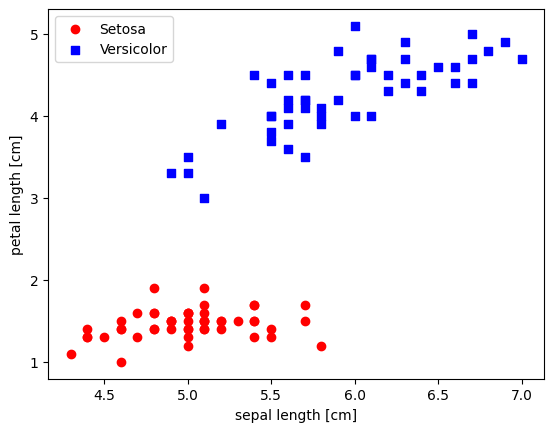

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [18]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

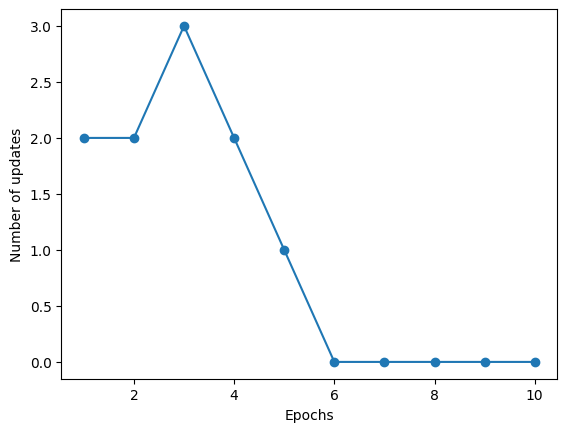

In [20]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)

# plot decision boundary
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [21]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=f'Class {cl}',edgecolors='black')

In [22]:
import warnings
warnings.filterwarnings(action='ignore')

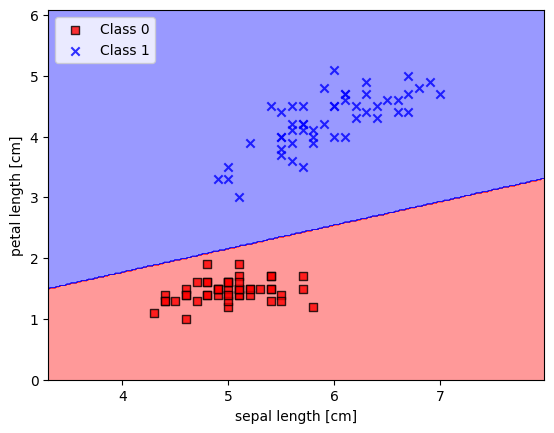

In [23]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# USING SCIKIT-LEARN API

In [24]:
from sklearn import datasets
import numpy as np

In [25]:
# load iris dataset
iris = datasets.load_iris()
print(dir(iris))
print('Feature Names:', iris.feature_names)
print('Target Names:', iris.target_names)
print('Data Shape:', iris.data.shape)
print('Target Shape:', iris.target.shape)
print('Data:', iris.data)
print('Target:', iris.target)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Data Shape: (150, 4)
Target Shape: (150,)
Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.

In [26]:

X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [27]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [28]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
# train the model using perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [30]:
# predict 
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [31]:
misclass = (y_test != y_pred).sum()
test_data_missclass= misclass/len(y_pred)
print(np.round(test_data_missclass,3))
print(np.round(np.round(test_data_missclass,3)* 100,2))

0.022
2.2


In [32]:
# Accuracy metric
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))
print('Accuracy: %.3f' % ppn.score(X_test_std,y_test)) 

Accuracy: 0.978
Accuracy: 97.78
Accuracy: 0.978


- y_test - true class labels
- y_pred - predicted class labels

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

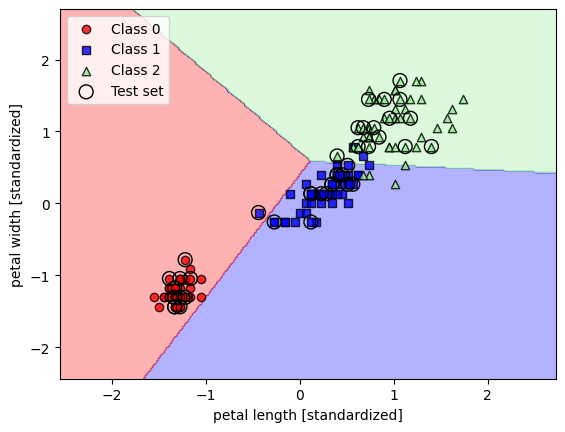

In [34]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

- As we can see in the resulting plot,the three flower classes cann't be perfectly seperated by a linear decision boundary.

# MODELING CLASS PROBABILITIES VIA LOGISTIC REGRESSION

- The perceptron rule offers a nice and easy-going introduction to machine learning algorithims for classification,its biggest disadvantage is that it never convergence if the classes are not perfectly linearly seperable.

# LOGISTIC REGRESSION AND CONDITIONAL PROBABILITIES

- Logistic regression is a classification model that is very easy to iimplement and perfroms very well on linearly seperable classes.
- Logistic regression is a generalization of the linear regression model to classification problems.
- Similar to the Perceptron and Adaline,the logistic regression model for binary classification.

- Logistic regression can be readlily generalized to multiclass settings,which is known as multinomial logistic regression or softmax regression.
- Another way to use logistic regression in multiclass settings is via the OvR technique.

In [35]:
from IPython.display import Image
%matplotlib inline

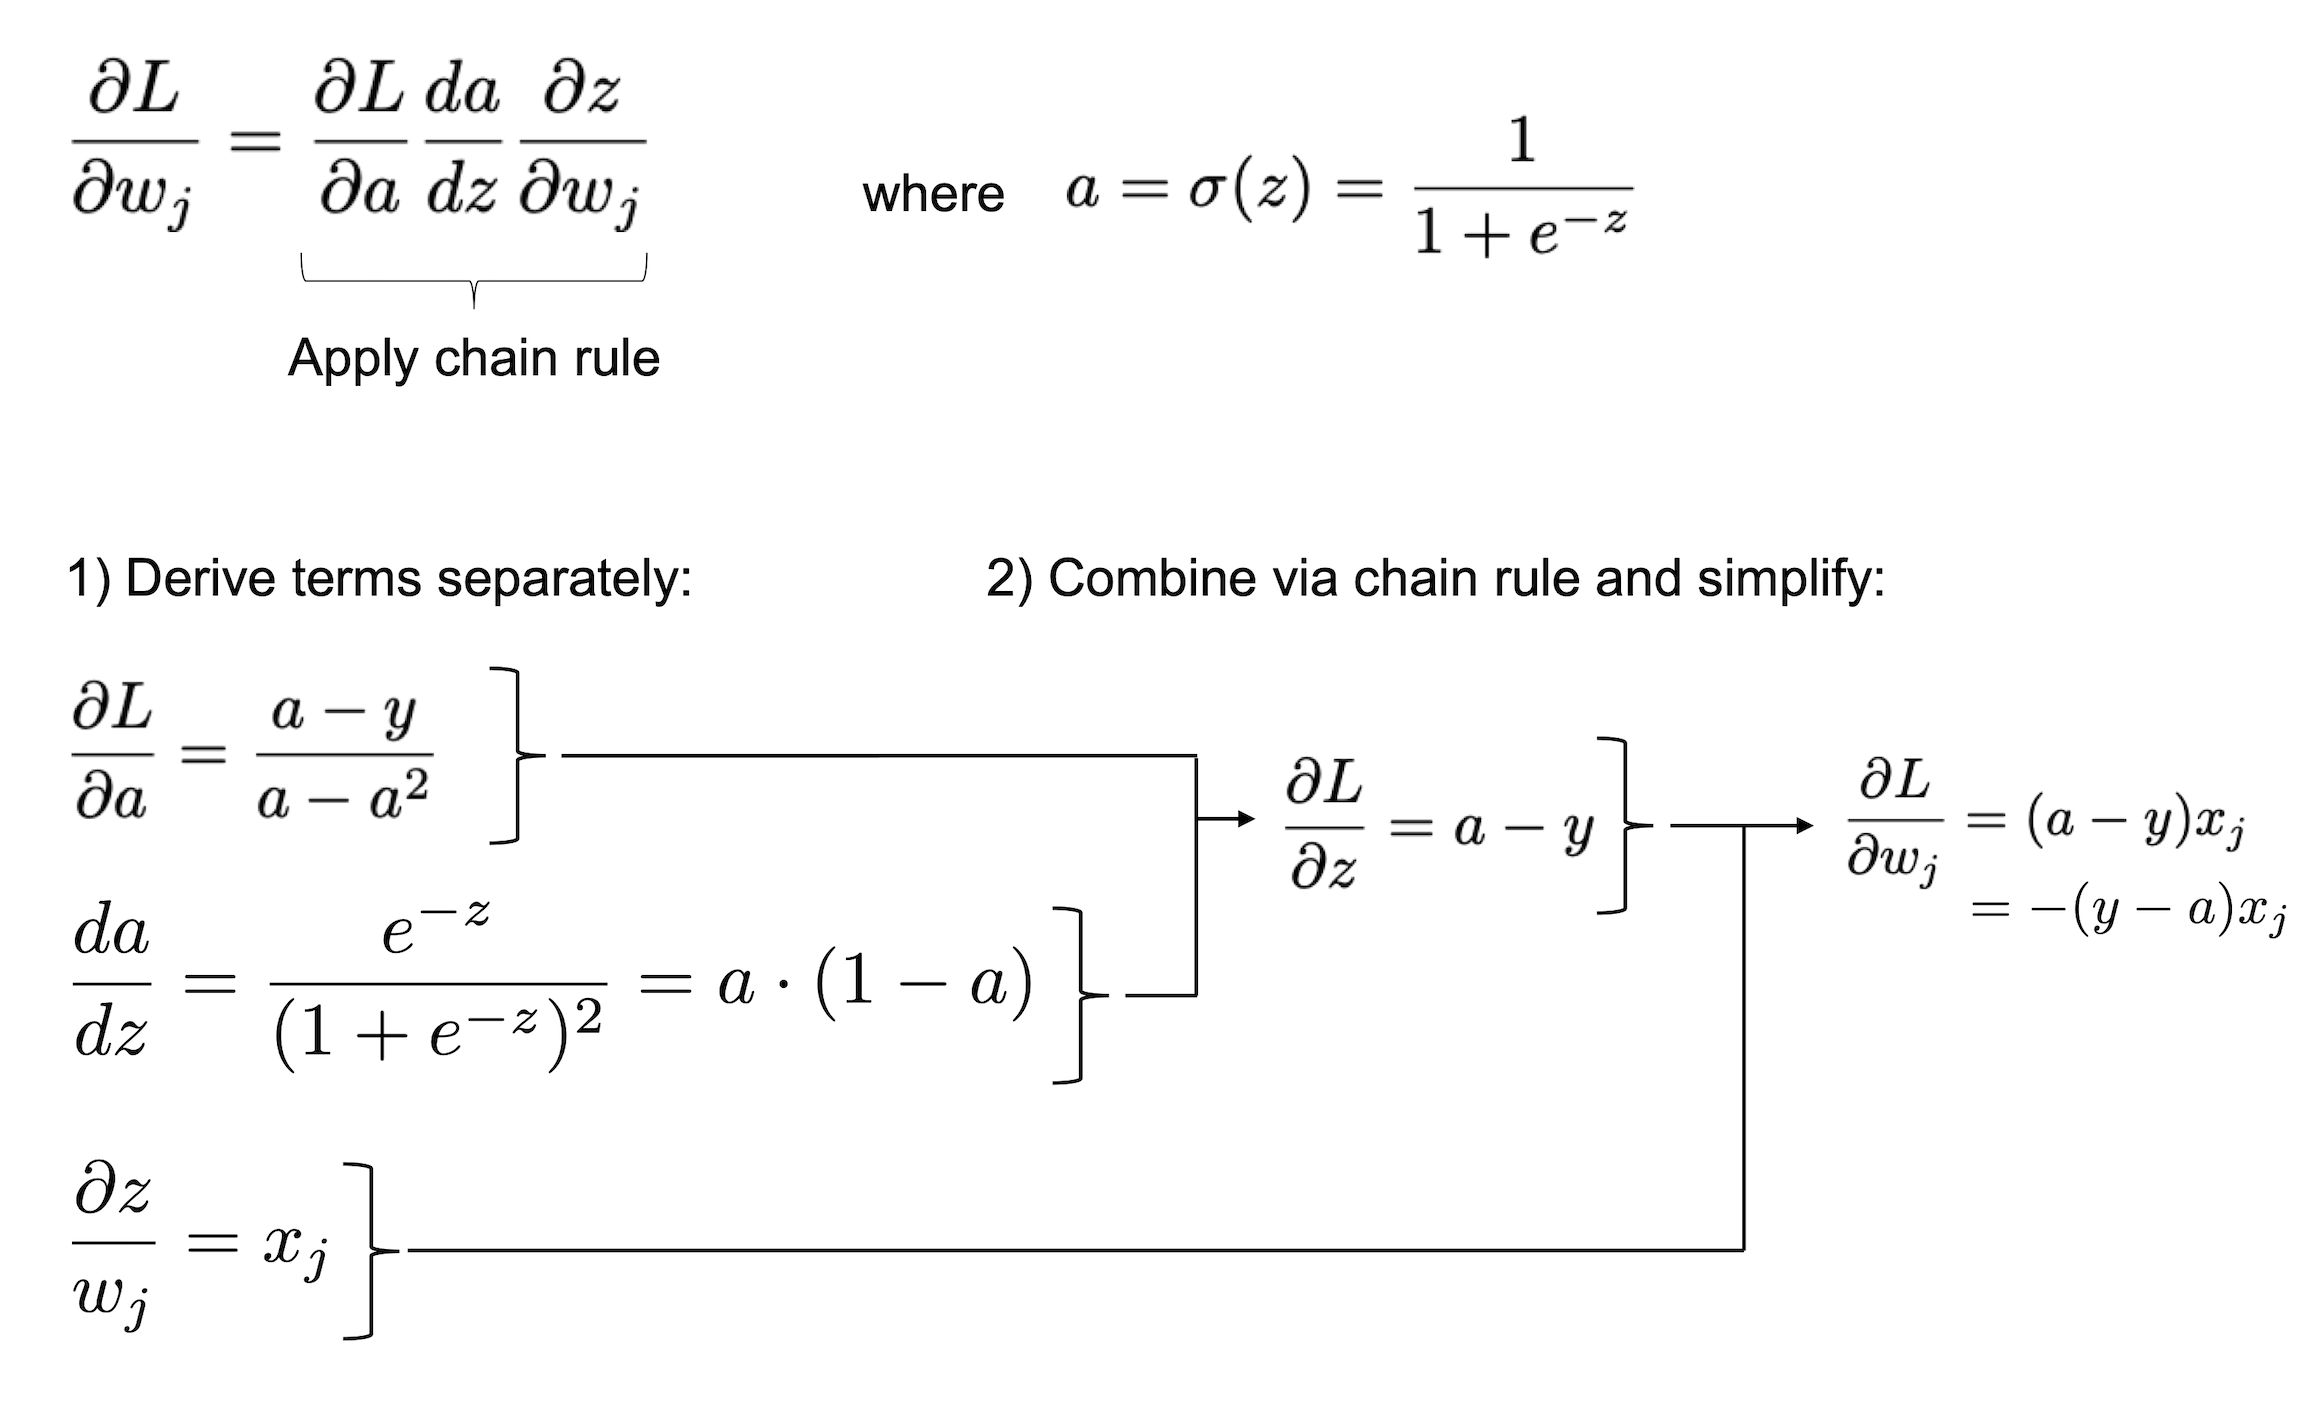

In [36]:
Image(filename='Images/03_25.png', width=500) 

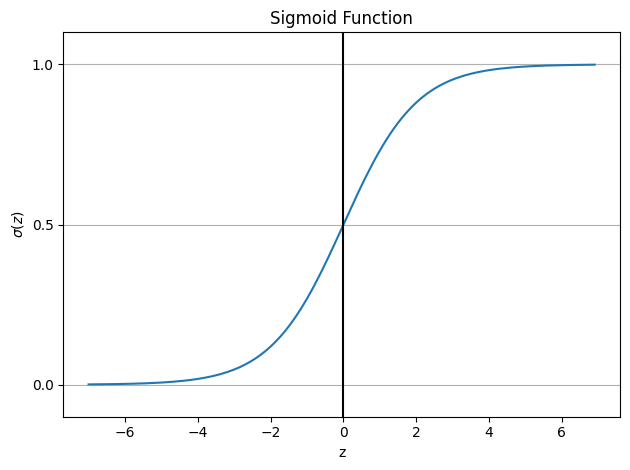

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Sigmoid Function')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# Learning the weights of the logistic loss function

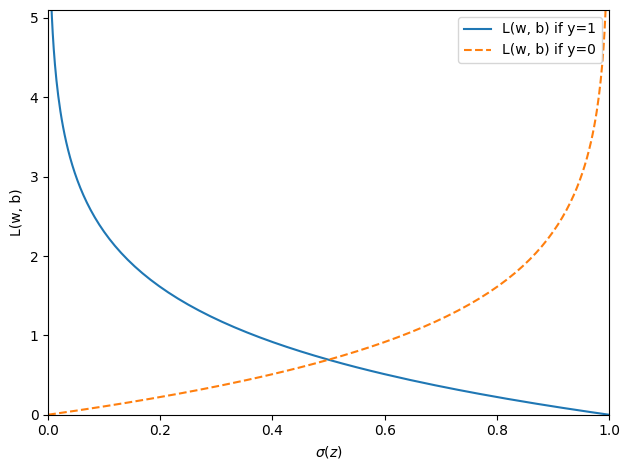

In [38]:
def loss_1(z):
    return - np.log(sigmoid(z))


def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_04.png', dpi=300)
plt.show()

- We can see that the loss approaches 0 (continuous line) if we correctly predict that an example belongs to class 1.
- Similarly,we can see on the y-axis that the loss also approaches 0 if we correctly predict y=0 (dashed line).
- However,if we the prediction is wrong,the loss goes toward infinity.
- The loss is a measure of how far away the prediction is from the correct value.
- The main point is that wrong predictions with an increasingly larger loss.

# CONVERTING AN ADALINE IMPLEMENTATION INTO AN ALGORITHM FOR LOGISTIC REGRESSION

In [39]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
       
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

    """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta *2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                    - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self,X):
        return np.dot(X, self.w_) + self.b_

    def activation(self,z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z,-250,250)))
    
    def predict(self,X):
        """Retun class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)
            

- When we fit logistic regression model,we have to keep in mind that it only works for binary classification tasks.

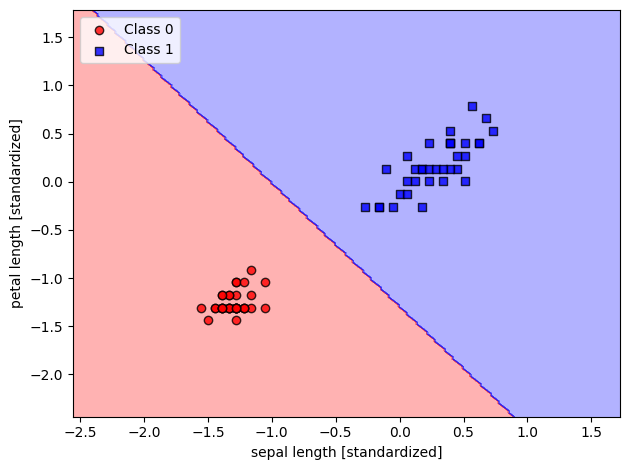

In [40]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, 
                            n_iter=1000, 
                            random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X = X_train_01_subset,
                      y = y_train_01_subset,
                      classifier = lrgd)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# TRAINING A LOGISIC REGRESSION MODEL WITH SCIKIT-LEARN

- Used for multiclass classification,multinomial or OvR is choosen automatically.

In [41]:
from sklearn.linear_model import LogisticRegression

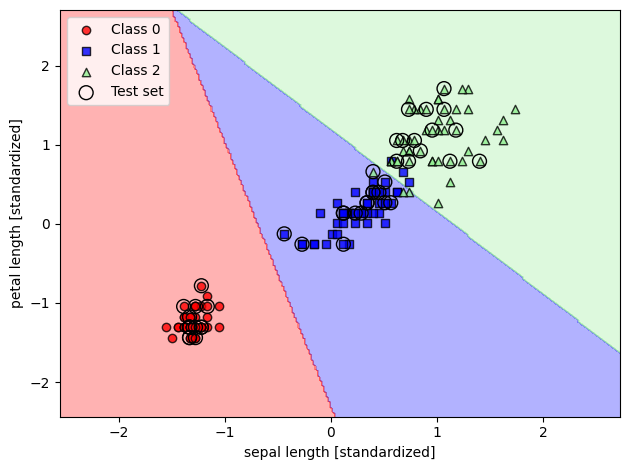

In [42]:
lr = LogisticRegression(C=100,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std,y_train)
plot_decision_regions(X = X_combined_std,
                      y = y_combined,
                      classifier = lr,
                      test_idx=range(105,150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- The probability that training examples belong to a certain class can be computed using the predict_proba method.

In [45]:
# we can predict the probabilities of the first 3 examples in the test dataset
lr.predict_proba(X_test_std[:3,:])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [46]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

In [47]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [50]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

# TACKLING OVERFITTING VIA REGULARIZATION

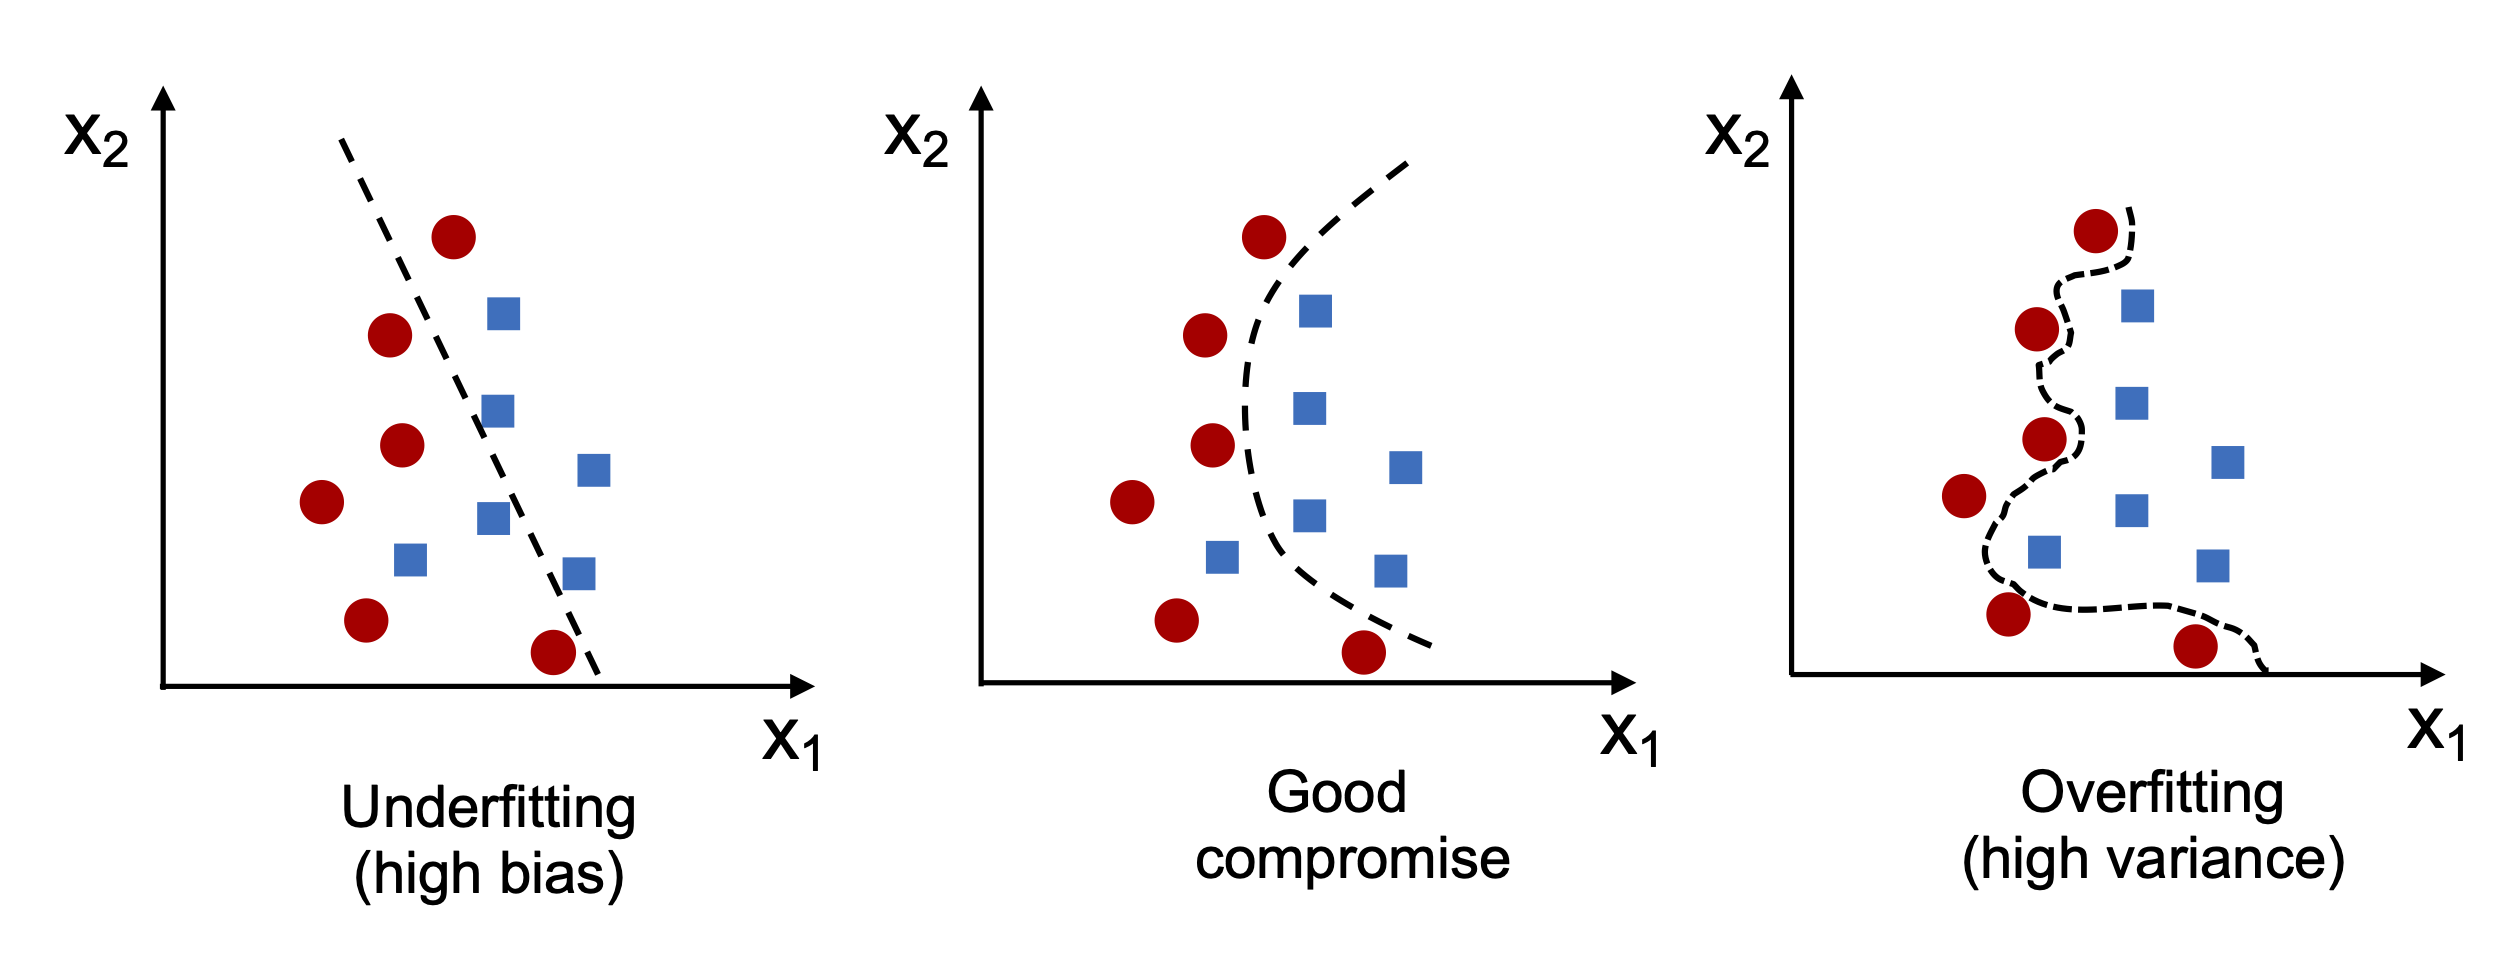

In [52]:
Image(filename='Images/03_07.png', width=700) 

- Via the regularization parameter,lambda,we can then control bow to closely we fit the training data,while keeping the weights small.
- By increasing the value of lambda,we increase the regularization strength.

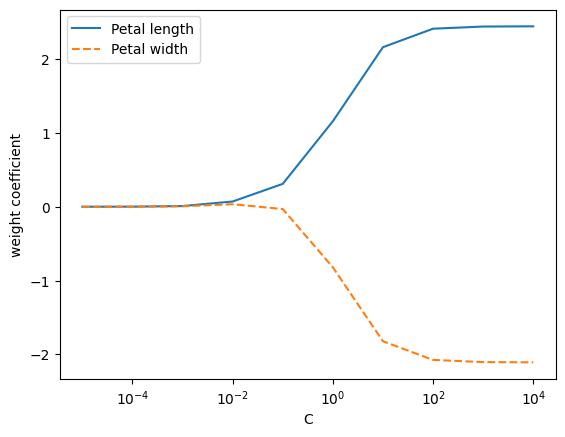

In [54]:
weights,params = [],[]
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.** c,multi_class='ovr')
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

plt.plot(params,weights[:,0],
         label='Petal length')
plt.plot(params,weights[:,1],linestyle='--',
         label='Petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()